In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.svm import SVR

In [26]:
from prettytable import PrettyTable  
df=pd.read_csv(r"C:\Users\Asus\Desktop\IIIT NR\2nd Sem\AIML Files\final project\ripple_dataset.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
print(df)

                  Date      High       Low      Open     Close
2014-09-16  16-09-2014  0.005803  0.005123  0.005123  0.005399
2014-09-17  17-09-2014  0.005521  0.005091  0.005398  0.005135
2014-09-18  18-09-2014  0.005167  0.004873  0.005134  0.004942
2014-09-19  19-09-2014  0.004954  0.004736  0.004942  0.004772
2014-09-20  20-09-2014  0.004791  0.004540  0.004768  0.004570
...                ...       ...       ...       ...       ...
2016-12-27  27-12-2016  0.006326  0.006188  0.006326  0.006199
2016-12-28  28-12-2016  0.006336  0.006126  0.006193  0.006173
2016-12-29  29-12-2016  0.006354  0.006167  0.006180  0.006341
2016-12-30  30-12-2016  0.006455  0.006338  0.006352  0.006426
2016-12-31  31-12-2016  0.006538  0.006387  0.006417  0.006449

[837 rows x 5 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_36392\1979257571.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=df.set_index(pd.DatetimeIndex(df['Date'].values))


In [86]:
future_days=5

In [87]:
df[str(future_days)+'_Day_Price_Forecaast']=df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_Price_Forecaast']]

,Close,5_Day_Price_Forecaast
2014-09-16,0.005399,0.004657
2014-09-17,0.005135,0.004613
2014-09-18,0.004942,0.004668
2014-09-19,0.004772,0.004722
2014-09-20,0.004570,0.004616
...,...,...
2016-12-27,0.006199,NaN
2016-12-28,0.006173,NaN
2016-12-29,0.006341,NaN
2016-12-30,0.006426,NaN


In [69]:
X=np.array(df[['Close']])
X=X[:df.shape[0]-future_days]
print(X)

[[0.00539852]
 [0.00513545]
 [0.00494225]
 [0.00477165]
 [0.00456989]
 [0.00465728]
 [0.00461318]
 [0.00466761]
 [0.00472228]
 [0.00461558]
 [0.00470504]
 [0.00528196]
 [0.00470454]
 [0.00464397]
 [0.00475239]
 [0.00487409]
 [0.00502282]
 [0.00494149]
 [0.00478866]
 [0.00472994]
 [0.00476536]
 [0.00478661]
 [0.0048238 ]
 [0.00487145]
 [0.00475305]
 [0.00485764]
 [0.00478419]
 [0.00487153]
 [0.00482708]
 [0.00485466]
 [0.00490406]
 [0.00496506]
 [0.00494914]
 [0.0050735 ]
 [0.00519264]
 [0.00518732]
 [0.0051418 ]
 [0.00508175]
 [0.00471925]
 [0.00454788]
 [0.0048914 ]
 [0.00484465]
 [0.00477601]
 [0.00488997]
 [0.00486669]
 [0.00467086]
 [0.00466442]
 [0.0048102 ]
 [0.00480483]
 [0.00486105]
 [0.00487745]
 [0.00487711]
 [0.00490699]
 [0.00492611]
 [0.00490147]
 [0.0048986 ]
 [0.0050974 ]
 [0.00503508]
 [0.00519666]
 [0.00505247]
 [0.00518113]
 [0.0053397 ]
 [0.00543151]
 [0.00569554]
 [0.00605795]
 [0.00658929]
 [0.00766316]
 [0.00859941]
 [0.00856188]
 [0.00974036]
 [0.0110036 ]
 [0.01

In [88]:
y=np.array(df[str(future_days)+'_Day_Price_Forecaast'])
y=y[:-future_days]
print(y)

[0.00465728 0.00461318 0.00466761 0.00472228 0.00461558 0.00470504
 0.00528196 0.00470454 0.00464397 0.00475239 0.00487409 0.00502282
 0.00494149 0.00478866 0.00472994 0.00476536 0.00478661 0.0048238
 0.00487145 0.00475305 0.00485764 0.00478419 0.00487153 0.00482708
 0.00485466 0.00490406 0.00496506 0.00494914 0.0050735  0.00519264
 0.00518732 0.0051418  0.00508175 0.00471925 0.00454788 0.0048914
 0.00484465 0.00477601 0.00488997 0.00486669 0.00467086 0.00466442
 0.0048102  0.00480483 0.00486105 0.00487745 0.00487711 0.00490699
 0.00492611 0.00490147 0.0048986  0.0050974  0.00503508 0.00519666
 0.00505247 0.00518113 0.0053397  0.00543151 0.00569554 0.00605795
 0.00658929 0.00766316 0.00859941 0.00856188 0.00974036 0.0110036
 0.0142048  0.0151648  0.0139819  0.0112114  0.0125585  0.0131579
 0.0131302  0.0133431  0.0137849  0.0144061  0.0147942  0.0134206
 0.0150682  0.0159075  0.0163741  0.0163741  0.0169923  0.0171268
 0.0182415  0.0215386  0.0260647  0.0279399  0.0233381  0.0242071
 0

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [74]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [92]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print('svr_rbf accurac:',svr_rbf_confidence)

svr_rbf accurac: -5.082370571363278


In [93]:
svm_prediction=svr_rbf.predict(x_test)
print(svm_prediction)

[0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499
 0.01601499 0.01601499 0.01601499 0.01601499 0.01601499 0.0160

In [77]:
print(y_test)

[0.0051822  0.0048238  0.00878588 0.00679995 0.00778238 0.00478661
 0.00849065 0.00805793 0.00669065 0.00651006 0.0112069  0.00787936
 0.00851873 0.00486669 0.00470454 0.00619434 0.00740404 0.0159907
 0.00494738 0.00742566 0.00898701 0.0167337  0.00787194 0.014443
 0.0050974  0.00586911 0.00579584 0.00534379 0.016112   0.00465728
 0.015648   0.00849837 0.00539754 0.00844066 0.0106431  0.00814314
 0.00450572 0.0104804  0.00676827 0.0058973  0.00823435 0.00532817
 0.0145771  0.00685693 0.00795649 0.0082305  0.00840912 0.00710519
 0.00582391 0.0100864  0.00816502 0.00967843 0.00829986 0.00477601
 0.00586803 0.00743345 0.00680917 0.00711834 0.00685828 0.00654461
 0.00822449 0.00902918 0.00595379 0.00589238 0.00590909 0.00639476
 0.00596901 0.00584216 0.00859006 0.0078907  0.010359   0.00833814
 0.0081934  0.00799855 0.00804398 0.00617777 0.0144061  0.0134012
 0.0052032  0.00575596 0.0114447  0.00485466 0.00885124 0.00424521
 0.00669322 0.0147942  0.00805628 0.00739715 0.0184344  0.00552017

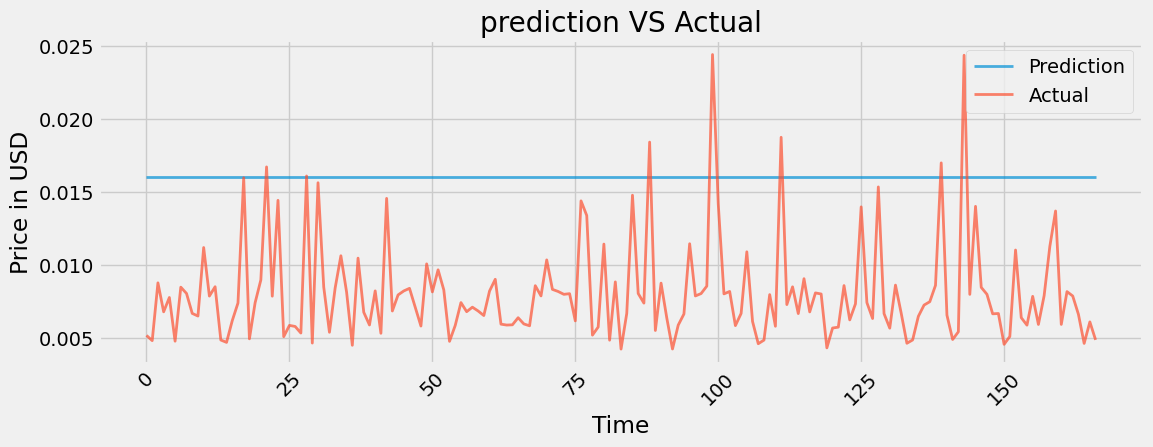

In [89]:
# plt.figure(figsize=(12,4))
# plt.plot(svm_prediction,label='Prediction',lw=2,alpha=.7)
# plt.plot(y_test,label='Actual',lw=2,alpha=.7)
# plt.title('prediction VS Actual')
# plt.ylabel("Price in USD")
# plt.xlabel('Time')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [80]:
X=np.array(df[['Date']])
X=X[:df.shape[0]]
print(X)

[['16-09-2014']
 ['17-09-2014']
 ['18-09-2014']
 ['19-09-2014']
 ['20-09-2014']
 ['21-09-2014']
 ['22-09-2014']
 ['23-09-2014']
 ['24-09-2014']
 ['25-09-2014']
 ['26-09-2014']
 ['27-09-2014']
 ['28-09-2014']
 ['29-09-2014']
 ['30-09-2014']
 ['01-10-2014']
 ['02-10-2014']
 ['03-10-2014']
 ['04-10-2014']
 ['05-10-2014']
 ['06-10-2014']
 ['07-10-2014']
 ['08-10-2014']
 ['09-10-2014']
 ['10-10-2014']
 ['11-10-2014']
 ['12-10-2014']
 ['13-10-2014']
 ['14-10-2014']
 ['15-10-2014']
 ['16-10-2014']
 ['17-10-2014']
 ['18-10-2014']
 ['19-10-2014']
 ['20-10-2014']
 ['21-10-2014']
 ['22-10-2014']
 ['23-10-2014']
 ['24-10-2014']
 ['25-10-2014']
 ['27-10-2014']
 ['28-10-2014']
 ['29-10-2014']
 ['30-10-2014']
 ['31-10-2014']
 ['01-11-2014']
 ['02-11-2014']
 ['03-11-2014']
 ['04-11-2014']
 ['05-11-2014']
 ['06-11-2014']
 ['07-11-2014']
 ['08-11-2014']
 ['09-11-2014']
 ['10-11-2014']
 ['11-11-2014']
 ['12-11-2014']
 ['13-11-2014']
 ['14-11-2014']
 ['15-11-2014']
 ['16-11-2014']
 ['17-11-2014']
 ['18-11

In [91]:
from prettytable import PrettyTable  
  
columns = ["Predicted", "Original"]  
  
newTable = PrettyTable()  
  
# Add Columns  
newTable.add_column(columns[0],svm_prediction )  
newTable.add_column(columns[1], y_test)  
# newTable.add_column(columns[2],X)
  
print(newTable)   

+----------------------+-------------+
|      Predicted       |   Original  |
+----------------------+-------------+
| 0.016014985500000002 |  0.0051822  |
| 0.016014985500000002 |  0.0048238  |
| 0.016014985500000002 |  0.00878588 |
| 0.016014985500000002 |  0.00679995 |
| 0.016014985500000002 |  0.00778238 |
| 0.016014985500000002 |  0.00478661 |
| 0.016014985500000002 |  0.00849065 |
| 0.016014985500000002 |  0.00805793 |
| 0.016014985500000002 |  0.00669065 |
| 0.016014985500000002 |  0.00651006 |
| 0.016014985500000002 |  0.0112069  |
| 0.016014985500000002 |  0.00787936 |
| 0.016014985500000002 |  0.00851873 |
| 0.016014985500000002 |  0.00486669 |
| 0.016014985500000002 |  0.00470454 |
| 0.016014985500000002 |  0.00619434 |
| 0.016014985500000002 |  0.00740404 |
| 0.016014985500000002 | 0.015990701 |
| 0.016014985500000002 |  0.00494738 |
| 0.016014985500000002 |  0.00742566 |
| 0.016014985500000002 |  0.00898701 |
| 0.016014985500000002 |  0.0167337  |
| 0.016014985500000002 | 